<a href="https://colab.research.google.com/github/fbeilstein/topological_data_analysis/blob/master/lecture_14_tomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- [ARTICLE](https://geometrica.saclay.inria.fr/data/Steve.Oudot/clustering/jacm_oudot.pdf)
- [SIMPLER ARTICLE](https://geometrica.saclay.inria.fr/team/Steve.Oudot/papers/cgos-pbc-09/cgos-pbcrm-11.pdf)
- [Fuzzy Clustering](https://arxiv.org/pdf/1406.7130)
- [Implementation](https://github.com/xetaxe/ToMATo-Notebook/blob/master/Guide%20ToMATo.ipynb)
- [GUDHI docs](https://gudhi.inria.fr/python/latest/clustering.html)

In [2]:
!pip install gudhi

####Half-moons

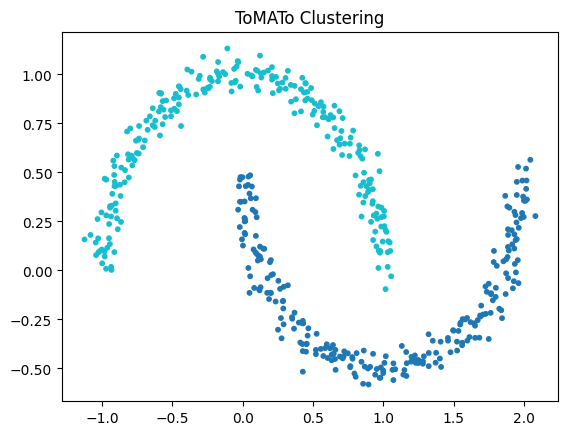

In [3]:
import numpy as np
from gudhi.clustering.tomato import Tomato
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate toy data
X, _ = make_moons(n_samples=500, noise=0.05)

# Apply ToMATo clustering
tomato = Tomato()
tomato.fit(X)
tomato.n_clusters_ = 2

# Plot result
plt.scatter(X[:, 0], X[:, 1], c=tomato.labels_, cmap='tab10', s=10)
plt.title("ToMATo Clustering")
plt.show()


####Rings

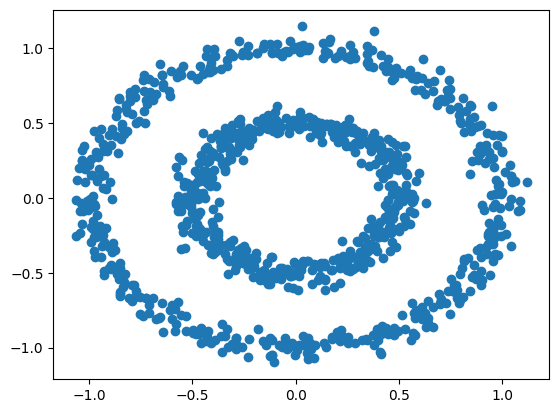

In [12]:
from sklearn import manifold, datasets
p2, y = datasets.make_circles(n_samples=1000, factor=.5, noise=.05)

fig, ax = plt.subplots();
ax.cla()
ax.scatter(*zip(*p2));
plt.draw()
plt.show()

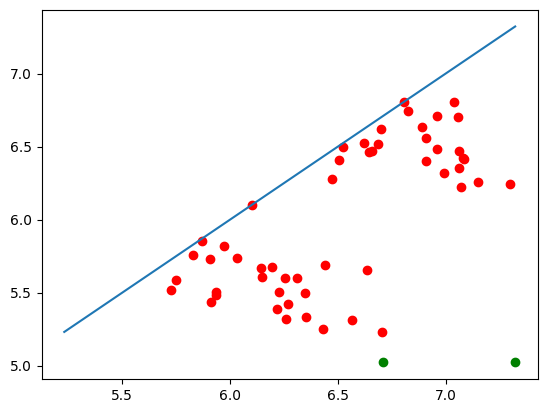

In [17]:
from gudhi.clustering.tomato import Tomato

t = Tomato()
t.fit(p2)
t.plot_diagram()

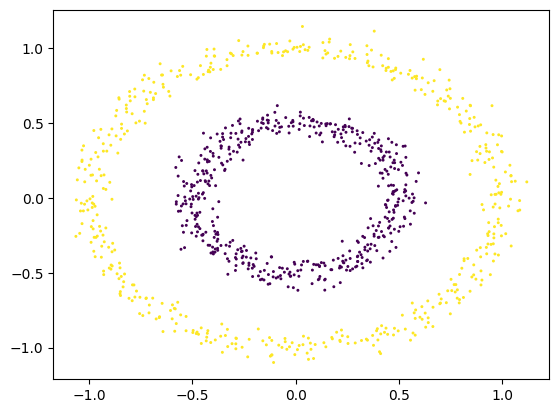

In [20]:
t.n_clusters_=2
plt.scatter(p2[:,0], p2[:,1],marker='.',s=5,c=t.labels_)
plt.show()

####Noisy half-moons

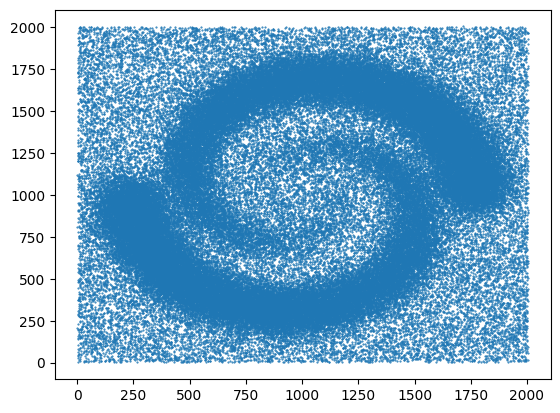

In [4]:
import gudhi
from gudhi.datasets.remote import fetch_spiral_2d
data = fetch_spiral_2d()
import matplotlib.pyplot as plt
plt.scatter(data[:,0],data[:,1],marker='.',s=1)
plt.show()

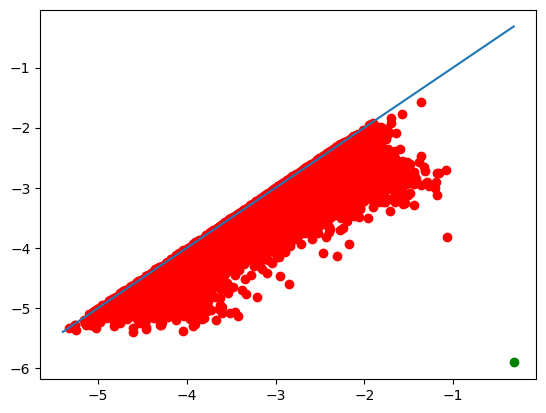

In [5]:
from gudhi.clustering.tomato import Tomato
t = Tomato()
t.fit(data)
t.plot_diagram()

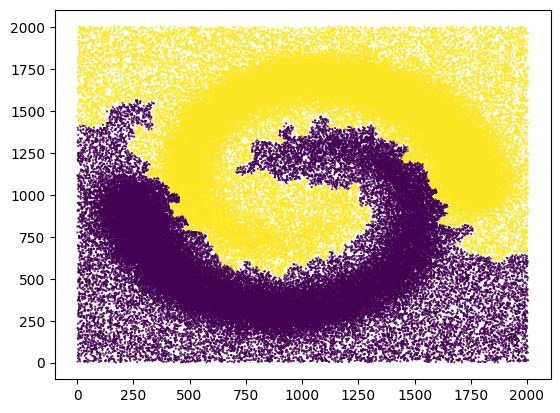

In [6]:
t.n_clusters_=2
plt.scatter(data[:,0],data[:,1],marker='.',s=1,c=t.labels_)
plt.show()

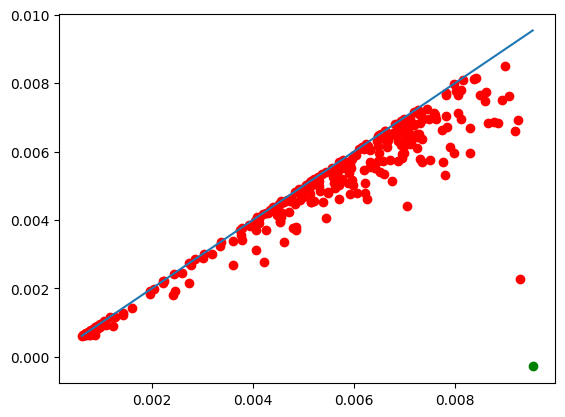

In [7]:
t = Tomato(density_type='DTM', k=100)
t.fit(data)
t.plot_diagram()

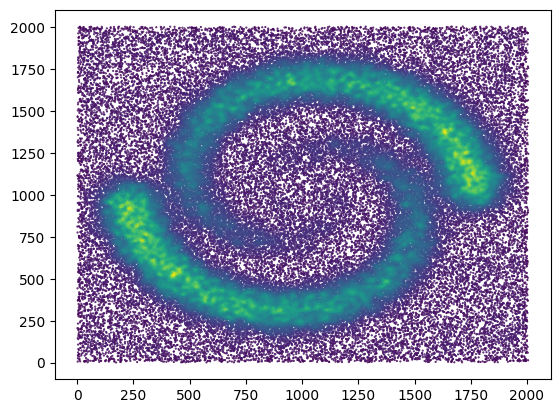

In [8]:
plt.scatter(data[:,0],data[:,1],marker='.',s=1,c=t.weights_)
plt.show()

####Swiss Roll

In [25]:
import random as rd
import numpy as np
from sklearn.datasets import make_swiss_roll
import plotly.graph_objects as go

points_cube = 1000
points_sphere = 800
points_sr = 8000
points_noise = 2000

# Cube points
X1 = np.array([[rd.uniform(-2, 2), rd.uniform(-2, 2), rd.uniform(-2, 2)] for _ in range(points_cube)])

# Sphere shell points
X2 = np.zeros((points_sphere, 3))
for i in range(points_sphere):
  x, y, z = rd.uniform(-1,1), rd.uniform(-1,1), rd.uniform(-1,1)
  norm = np.sqrt(x**2 + y**2 + z**2) + 1e-8  # avoid division by zero
  X2[i] = [12 + 3*x/norm, 15 + 3*y/norm, -4 + 3*z/norm]

# Swiss roll
X4, _ = make_swiss_roll(n_samples=points_sr, noise=.05)

# Random noise
X5 = np.array([[rd.uniform(-10, 15), rd.uniform(-5, 20), rd.uniform(-10, 15)] for _ in range(points_noise)])

# Combine all
X = np.concatenate((X1, X2, X4, X5))

# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
  x=X[:, 0],
  y=X[:, 1],
  z=X[:, 2],
  mode='markers',
  marker=dict(
    size=2,
    color='red',
    opacity=0.8
  )
)])

# Set camera view similar to view_init(7, -70)
fig.update_layout(
  scene_camera=dict(eye=dict(x=2, y=0.2, z=1.8)),
  scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z',
  ),
  margin=dict(l=0, r=0, b=0, t=0)
)

fig.show()


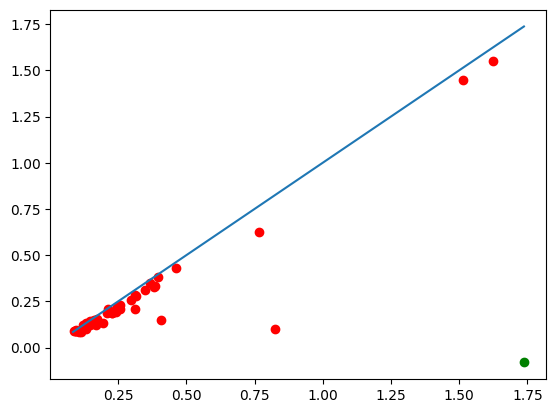

In [26]:
t = Tomato(density_type='DTM', k=100)
t.fit(X)
t.plot_diagram()